<a href="https://colab.research.google.com/github/gw1129/GitHub/blob/master/homo_lumo_RedDB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q rdkit-pypi==2022.9.5 pandas==1.5.3 numpy==1.26.4 scikit-learn tqdm

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

print("✅ 라이브러리 임포트 성공!")

✅ 라이브러리 임포트 성공!


In [4]:
# ✅ SMILES 목록 (간단한 유/무기 전해질 후보)
smiles_list = [
    "CCO",       # 에탄올
    "CCN",       # 에틸아민
    "CCC",       # 프로판
    "CCCl",      # 클로로에탄
    "C1CCCCC1",  # 사이클로헥산
    "C1=CC=CC=C1", # 벤젠
    "COC",       # 다이메틸에테르
    "CC(=O)O",   # 아세트산
    "CN(C)C",    # 트라이메틸아민
    "CC#N"       # 아세토니트릴
]

# ✅ 분자 특성 및 가상 HOMO/LUMO 계산
np.random.seed(42)  # 결과 재현 가능성 확보
data = []
for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    h_donors = Descriptors.NumHDonors(mol)
    h_acceptors = Descriptors.NumHAcceptors(mol)
    rot_bonds = Descriptors.NumRotatableBonds(mol)
    homo = -np.random.uniform(5, 10)   # HOMO: -5 ~ -10 eV
    lumo = -np.random.uniform(1, 5)    # LUMO: -1 ~ -5 eV
    data.append([smi, mw, logp, h_donors, h_acceptors, rot_bonds, homo, lumo])

columns = ['SMILES', 'MolWt', 'LogP', 'HDonors', 'HAcceptors', 'RotBonds', 'HOMO', 'LUMO']
df = pd.DataFrame(data, columns=columns)
df.head()


,SMILES,MolWt,LogP,HDonors,HAcceptors,RotBonds,HOMO,LUMO
0,CCO,46.069,-0.0014,1,1,0,-6.872701,-4.802857
1,CCN,45.085,-0.0350,1,1,0,-8.659970,-3.394634
2,CCC,44.097,1.4163,0,0,0,-5.780093,-1.623978
3,CCCl,64.515,1.2451,0,0,0,-5.290418,-4.464705
4,C1CCCCC1,84.162,2.3406,0,0,0,-8.005575,-3.832290


In [5]:
# ✅ 입력 특성(X)과 예측 대상(y) 설정
features = ['MolWt', 'LogP', 'HDonors', 'HAcceptors', 'RotBonds']
X = df[features]
y_homo = df['HOMO']
y_lumo = df['LUMO']

# ✅ 학습/테스트 셋 분리 (8:2 비율)
X_train, X_test, y_train_homo, y_test_homo = train_test_split(X, y_homo, test_size=0.2, random_state=42)
X_train, X_test, y_train_lumo, y_test_lumo = train_test_split(X, y_lumo, test_size=0.2, random_state=42)

# ✅ 모델 정의 및 훈련
model_homo = RandomForestRegressor(random_state=42)
model_homo.fit(X_train, y_train_homo)
pred_homo = model_homo.predict(X_test)

model_lumo = RandomForestRegressor(random_state=42)
model_lumo.fit(X_train, y_train_lumo)
pred_lumo = model_lumo.predict(X_test)


In [6]:
# 평가 지표 출력
print("📈 HOMO 예측 MAE:", mean_absolute_error(y_test_homo, pred_homo))
print("📊 HOMO 예측 R² :", r2_score(y_test_homo, pred_homo))
print()
print("📈 LUMO 예측 MAE:", mean_absolute_error(y_test_lumo, pred_lumo))
print("📊 LUMO 예측 R² :", r2_score(y_test_lumo, pred_lumo))


📈 HOMO 예측 MAE: 1.2443903408049488
📊 HOMO 예측 R² : -0.4372113947820757

📈 LUMO 예측 MAE: 0.5570563993909168
📊 LUMO 예측 R² : -13.797529215156132


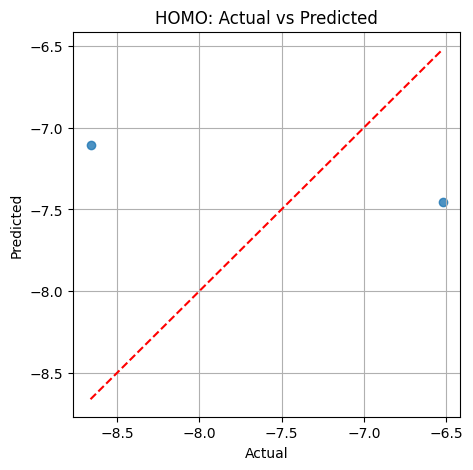

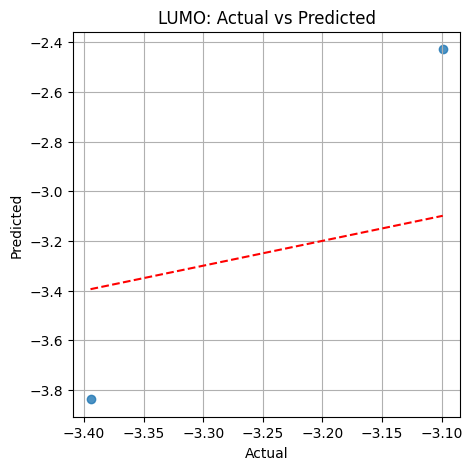

In [7]:
import matplotlib.pyplot as plt

# 공통 스타일 설정
def plot_true_vs_pred(y_true, y_pred, title):
    plt.figure(figsize=(5, 5))
    plt.scatter(y_true, y_pred, alpha=0.8)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')  # y = x 기준선
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.grid(True)
    plt.show()

# HOMO 예측 결과 시각화
plot_true_vs_pred(y_test_homo, pred_homo, "HOMO: Actual vs Predicted")

# LUMO 예측 결과 시각화
plot_true_vs_pred(y_test_lumo, pred_lumo, "LUMO: Actual vs Predicted")


In [9]:
from google.colab import files

# 📤 파일 업로드 창 열기
uploaded = files.upload()

Saving redox_sample_1000.csv to redox_sample_1000.csv


In [10]:
import pandas as pd

# 파일 이름은 그대로 유지했을 경우
df = pd.read_csv('redox_sample_1000.csv')

# 상위 5개 샘플 확인
df.head()

,SMILES,HOMO (eV),LUMO (eV)
0,COC1=CC=CC=C1OC,-6.780078,-0.739154
1,CCN(CC)CC,-9.130478,-0.690109
2,CC1=CC=CC=C1O,-8.464815,-4.231036
3,CC(C)CO,-6.011063,-3.795178
4,COC1=CC=CC=C1OC,-10.093753,-4.510653


In [11]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from tqdm import tqdm

# RDKit 특성 추출 함수
def featurize(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * 5
    return [
        Descriptors.MolWt(mol),
        Descriptors.MolLogP(mol),
        Descriptors.NumHDonors(mol),
        Descriptors.NumHAcceptors(mol),
        Descriptors.NumRotatableBonds(mol)
    ]

# tqdm 진행 표시
tqdm.pandas()
features = df['SMILES'].progress_apply(featurize)
features_df = pd.DataFrame(features.tolist(), columns=['MolWt', 'LogP', 'HDonors', 'HAcceptors', 'RotBonds'])

# 원본과 병합
df_features = pd.concat([df, features_df], axis=1).dropna()
df_features.head()

100%|██████████| 1000/1000 [00:00<00:00, 1527.99it/s]


,SMILES,HOMO (eV),LUMO (eV),MolWt,LogP,HDonors,HAcceptors,RotBonds
0,COC1=CC=CC=C1OC,-6.780078,-0.739154,138.166,1.70380,0,2,2
1,CCN(CC)CC,-9.130478,-0.690109,101.193,1.34810,0,1,3
2,CC1=CC=CC=C1O,-8.464815,-4.231036,108.140,1.70062,1,1,0
3,CC(C)CO,-6.011063,-3.795178,74.123,0.63470,1,1,1
4,COC1=CC=CC=C1OC,-10.093753,-4.510653,138.166,1.70380,0,2,2


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 입력(X), 출력(y) 분리
X = df_features[['MolWt', 'LogP', 'HDonors', 'HAcceptors', 'RotBonds']]
y_homo = df_features['HOMO (eV)']
y_lumo = df_features['LUMO (eV)']

# 학습/테스트 분리
X_train, X_test, y_train_homo, y_test_homo = train_test_split(X, y_homo, test_size=0.2, random_state=42)
_, _, y_train_lumo, y_test_lumo = train_test_split(X, y_lumo, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델
model_homo = RandomForestRegressor(random_state=42)
model_homo.fit(X_train, y_train_homo)
pred_homo = model_homo.predict(X_test)

model_lumo = RandomForestRegressor(random_state=42)
model_lumo.fit(X_train, y_train_lumo)
pred_lumo = model_lumo.predict(X_test)

# 평가 지표 출력
print("📈 HOMO MAE:", mean_absolute_error(y_test_homo, pred_homo))
print("📊 HOMO R² :", r2_score(y_test_homo, pred_homo))
print("📈 LUMO MAE:", mean_absolute_error(y_test_lumo, pred_lumo))
print("📊 LUMO R² :", r2_score(y_test_lumo, pred_lumo))

📈 HOMO MAE: 1.25635933517363
📊 HOMO R² : -0.01784195579017167
📈 LUMO MAE: 1.2832915040333086
📊 LUMO R² : -0.008997254650743303


In [13]:
!pip install xgboost

In [14]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

# 모델 정의
model_homo_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
model_lumo_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)

# 학습
model_homo_xgb.fit(X_train, y_train_homo)
model_lumo_xgb.fit(X_train, y_train_lumo)

# 예측
pred_homo_xgb = model_homo_xgb.predict(X_test)
pred_lumo_xgb = model_lumo_xgb.predict(X_test)

# 평가
print("📈 HOMO MAE:", mean_absolute_error(y_test_homo, pred_homo_xgb))
print("📊 HOMO R² :", r2_score(y_test_homo, pred_homo_xgb))
print("📈 LUMO MAE:", mean_absolute_error(y_test_lumo, pred_lumo_xgb))
print("📊 LUMO R² :", r2_score(y_test_lumo, pred_lumo_xgb))

📈 HOMO MAE: 1.255241158744027
📊 HOMO R² : -0.01659102998677353
📈 LUMO MAE: 1.2832574590109858
📊 LUMO R² : -0.00846722321234017


In [15]:
# PyTorch & PyG 설치
!pip install torch torchvision torchaudio torch-scatter torch-sparse torch-geometric rdkit-pypi -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [22]:
from rdkit import Chem
from torch_geometric.data import Data
import torch

# 원자 특성 벡터화 (간단 버전)
def atom_features(atom):
    return torch.tensor([atom.GetAtomicNum()], dtype=torch.float)

# RDKit Mol → PyG Data
def smiles_to_graph(smiles, homo, lumo):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    # 노드 특성 (원자 번호만 사용)
    x = torch.stack([atom_features(atom) for atom in mol.GetAtoms()])

    # 엣지 정보
    edge_index = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        edge_index += [[i, j], [j, i]]  # 무방향 그래프

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

    # 타깃 레이블 (HOMO, LUMO)
    y = torch.tensor([[homo, lumo]], dtype=torch.float)  # shape: [1, 2]

    return Data(x=x, edge_index=edge_index, y=y)


In [23]:
import pandas as pd

# 업로드한 데이터 로딩
df = pd.read_csv("redox_sample_1000.csv")

# 변환 실행
graph_list = []
for _, row in df.iterrows():
    graph = smiles_to_graph(row['SMILES'], row['HOMO (eV)'], row['LUMO (eV)'])
    if graph is not None:
        graph_list.append(graph)

print(f"✅ 변환된 그래프 수: {len(graph_list)}개")


✅ 변환된 그래프 수: 1000개


In [24]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

class GCN_HomoLumo(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, output_dim=2):
        super(GCN_HomoLumo, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc1 = nn.Linear(hidden_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)  # 그래프 단위 집계
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # 출력: [HOMO, LUMO]
        return x


In [25]:
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split

# 학습/검증 분할
train_graphs, test_graphs = train_test_split(graph_list, test_size=0.2, random_state=42)

train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=32, shuffle=False)


In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GCN_HomoLumo().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# 학습 함수
def train(model, loader):
    model.train()
    total_loss = 0
    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        pred = model(data)
        loss = loss_fn(pred, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(loader.dataset)

# 평가 함수
def evaluate(model, loader):
    model.eval()
    total_loss = 0
    y_true, y_pred = [], []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            pred = model(data)
            loss = loss_fn(pred, data.y)
            total_loss += loss.item() * data.num_graphs
            y_true.append(data.y.cpu())
            y_pred.append(pred.cpu())
    return total_loss / len(loader.dataset), torch.cat(y_true), torch.cat(y_pred)


In [30]:
for epoch in range(1, 31):  # 30 에폭
    loss = train(model, train_loader)
    val_loss, y_true_tensor, y_pred_tensor = evaluate(model, test_loader)
    print(f"Epoch {epoch:02d} | Train Loss: {loss:.4f} | Test Loss: {val_loss:.4f}")


Epoch 01 | Train Loss: 2.1049 | Test Loss: 2.1442
Epoch 02 | Train Loss: 2.1097 | Test Loss: 2.1634
Epoch 03 | Train Loss: 2.0984 | Test Loss: 2.1378
Epoch 04 | Train Loss: 2.0855 | Test Loss: 2.1394
Epoch 05 | Train Loss: 2.1176 | Test Loss: 2.1999
Epoch 06 | Train Loss: 2.0903 | Test Loss: 2.1406
Epoch 07 | Train Loss: 2.0884 | Test Loss: 2.1402
Epoch 08 | Train Loss: 2.0928 | Test Loss: 2.1765
Epoch 09 | Train Loss: 2.1032 | Test Loss: 2.1710
Epoch 10 | Train Loss: 2.1053 | Test Loss: 2.1370
Epoch 11 | Train Loss: 2.0938 | Test Loss: 2.1590
Epoch 12 | Train Loss: 2.0861 | Test Loss: 2.1389
Epoch 13 | Train Loss: 2.0895 | Test Loss: 2.1384
Epoch 14 | Train Loss: 2.0890 | Test Loss: 2.1433
Epoch 15 | Train Loss: 2.0988 | Test Loss: 2.1470
Epoch 16 | Train Loss: 2.1282 | Test Loss: 2.1512
Epoch 17 | Train Loss: 2.0979 | Test Loss: 2.1432
Epoch 18 | Train Loss: 2.1026 | Test Loss: 2.1431
Epoch 19 | Train Loss: 2.1044 | Test Loss: 2.1475
Epoch 20 | Train Loss: 2.1052 | Test Loss: 2.1969


In [31]:
def plot_scatter(true_vals, pred_vals, label):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(5, 5))
    plt.scatter(true_vals, pred_vals, alpha=0.6)
    plt.plot([min(true_vals), max(true_vals)], [min(true_vals), max(true_vals)], 'r--')
    plt.xlabel(f"Actual {label}")
    plt.ylabel(f"Predicted {label}")
    plt.title(f"{label} Prediction (GNN)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


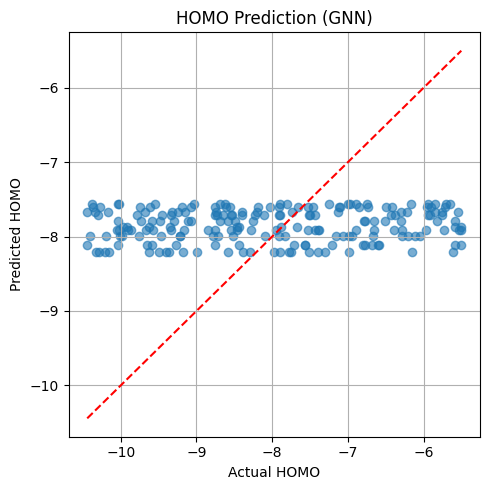

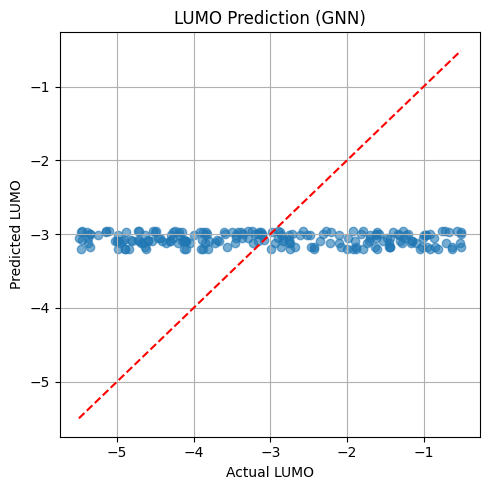

In [32]:
# GNN 예측 결과 시각화
plot_scatter(y_true_tensor[:, 0], y_pred_tensor[:, 0], "HOMO")
plot_scatter(y_true_tensor[:, 1], y_pred_tensor[:, 1], "LUMO")


In [33]:
from sklearn.metrics import mean_absolute_error, r2_score

# 예측 정확도 출력 함수
def print_regression_metrics(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"📈 {label} MAE: {mae:.4f}")
    print(f"📊 {label} R² : {r2:.4f}")

# HOMO 예측 성능
print_regression_metrics(y_true_tensor[:, 0], y_pred_tensor[:, 0], "HOMO")

# LUMO 예측 성능
print_regression_metrics(y_true_tensor[:, 1], y_pred_tensor[:, 1], "LUMO")


📈 HOMO MAE: 1.2664
📊 HOMO R² : -0.0111
📈 LUMO MAE: 1.2888
📊 LUMO R² : -0.0106
